# Logistic Regression untuk memprediksi Absen Pekerja

# Tahap 1 - Pembuatan Model

Data telah di preprocess sebelumnya, dan prosesnya cukup panjang. 
Untuk melihat ringkasan dari proses pre-processing, saya sudah membuat modul OOP untuk preprocessing, dan dapat dilihat pada ***Tahap 2***.

## Import the relevant libraries

In [76]:
import pandas as pd
import numpy as np

## Load the data

In [77]:
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')

In [78]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Create the targets

In [79]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [80]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                   data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

In [136]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [82]:
data_preprocessed['Excessive Absenteeism'] = targets

In [83]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


## A comment on the targets

In [84]:
targets.sum() / targets.shape[0]

0.45571428571428574

In [85]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours','Day of the Week',
                                            'Daily Work Load Average','Distance to Work'],axis=1)

In [86]:
data_with_targets is data_preprocessed

False

In [87]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


## Select the inputs for the regression

In [88]:
data_with_targets.shape

(700, 12)

In [89]:
data_with_targets.iloc[:,:14]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0,1
696,1,0,0,0,5,225,28,24,0,1,2,0
697,1,0,0,0,5,330,28,25,1,0,0,1
698,0,0,0,1,5,235,32,25,1,0,0,0


In [90]:
data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0
696,1,0,0,0,5,225,28,24,0,1,2
697,1,0,0,0,5,330,28,25,1,0,0
698,0,0,0,1,5,235,32,25,1,0,0


In [91]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

## Standardize the data

In [92]:
from sklearn.preprocessing import StandardScaler

absenteeism_scaler = StandardScaler()

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [94]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [95]:
#columns_to_scale = ['Month Value','Day of the Week', 'Transportation Expense', 'Distance to Work',
       #'Age', 'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pet']

columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [96]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [97]:
absenteeism_scaler = CustomScaler(columns_to_scale)

C:\Users\Rifqi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [ ]:
absenteeism_scaler.fit(unscaled_inputs)

In [99]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [100]:
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


In [101]:
scaled_inputs.shape

(700, 11)

## Split the data into train & test and shuffle

### Import the relevant module

In [102]:
from sklearn.model_selection import train_test_split

### Split

In [103]:
train_test_split(scaled_inputs, targets)

[     Reason_1  Reason_2  Reason_3  Reason_4  Month Value  \
 307         0         0         0         1     1.039256   
 243         1         0         0         0     0.182726   
 238         1         0         0         0     0.182726   
 380         0         0         0         1    -1.244823   
 665         0         0         0         1    -0.673803   
 ..        ...       ...       ...       ...          ...   
 28          0         0         1         0     0.468236   
 244         1         0         0         0     0.182726   
 257         1         0         0         0     0.468236   
 521         1         0         0         0     1.039256   
 204         1         0         0         0    -0.388293   
 
      Transportation Expense       Age  Body Mass Index  Education  Children  \
 307                1.036026  0.562059        -0.408580          0 -0.019280   
 243                1.624567 -1.320435        -0.408580          1 -0.919030   
 238               -1.5746

In [104]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [105]:
print (x_train.shape, y_train.shape)

(560, 11) (560,)


In [106]:
print (x_test.shape, y_test.shape)

(140, 11) (140,)


## Logistic regression with sklearn

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training the model

In [108]:
reg = LogisticRegression()

In [109]:
reg.fit(x_train,y_train)

LogisticRegression()

In [110]:
reg.score(x_train,y_train)

0.7732142857142857

### Manually check the accuracy

In [111]:
model_outputs = reg.predict(x_train)
model_outputs

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [112]:
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [113]:
model_outputs == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [114]:
np.sum((model_outputs==y_train))

433

In [115]:
model_outputs.shape[0]

560

In [116]:
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.7732142857142857

### Finding the intercept and coefficients

In [117]:
reg.intercept_

array([-1.6474549])

In [118]:
reg.coef_

array([[ 2.80019733,  0.95188356,  3.11555338,  0.83900082,  0.1589299 ,
         0.60528415, -0.16989096,  0.27981088, -0.21053312,  0.34826214,
        -0.27739602]])

In [119]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [120]:
feature_name = unscaled_inputs.columns.values

In [121]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,Reason_1,2.800197
1,Reason_2,0.951884
2,Reason_3,3.115553
3,Reason_4,0.839001
4,Month Value,0.158930
5,Transportation Expense,0.605284
6,Age,-0.169891
7,Body Mass Index,0.279811
8,Education,-0.210533
9,Children,0.348262


In [122]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.647455
1,Reason_1,2.800197
2,Reason_2,0.951884
3,Reason_3,3.115553
4,Reason_4,0.839001
5,Month Value,0.158930
6,Transportation Expense,0.605284
7,Age,-0.169891
8,Body Mass Index,0.279811
9,Education,-0.210533


## Interpreting the coefficients

In [123]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [124]:
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-1.647455,0.192539
1,Reason_1,2.800197,16.447892
2,Reason_2,0.951884,2.590585
3,Reason_3,3.115553,22.545903
4,Reason_4,0.839001,2.314054
5,Month Value,0.158930,1.172256
6,Transportation Expense,0.605284,1.831773
7,Age,-0.169891,0.843757
8,Body Mass Index,0.279811,1.322880
9,Education,-0.210533,0.810152


In [125]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.115553,22.545903
1,Reason_1,2.800197,16.447892
2,Reason_2,0.951884,2.590585
4,Reason_4,0.839001,2.314054
6,Transportation Expense,0.605284,1.831773
10,Children,0.348262,1.416604
8,Body Mass Index,0.279811,1.322880
5,Month Value,0.158930,1.172256
7,Age,-0.169891,0.843757
9,Education,-0.210533,0.810152


## Testing the model

In [126]:
reg.score(x_test,y_test)

0.75

In [127]:
predicted_proba = reg.predict_proba(x_test)
#predicted_proba

In [128]:
predicted_proba.shape

(140, 2)

In [129]:
import seaborn as sns
sns.set()

<AxesSubplot:ylabel='Count'>

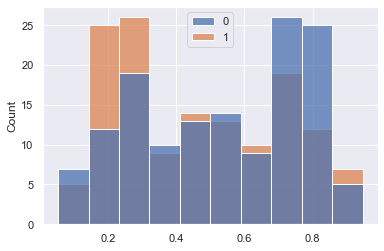

In [134]:
sns.histplot(predicted_proba)

## Save the model

In [131]:
import pickle

In [132]:
with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [133]:
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)